In [1]:
import torch, torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import torchvision.transforms as transforms
import numpy as np
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model = torchvision.models.resnext50_32x4d(pretrained=True)
layer0 = nn.Sequential(*list(model.children())[0:4])
layers = [layer0, *list(model.children())[4:-2]]
print(len(layers))

5


In [7]:
model = model.to("cuda")
def deepdream(img_fn, layer_contributions = [0,2,1,1,1]):
    image = Image.open(img_fn)
    #display.display(image)
    transform = transforms.ToTensor()
    image = transform(image)
    image = image.reshape(1,*image.shape)
    image = image.to("cuda")
    #plt.imshow(np.array(image)[0].transpose(1,2,0))
    for itr in range(501):
        image.requires_grad = True
        loss = 0
        output = image
        for j, layer in enumerate(layers):
            output = layer(output)
            scale = output.shape[1]*output.shape[2]#*output.shape[3]
            loss+=(layer_contributions[j]*torch.sum(output[:,:,2:-2,2:-2]**2)/scale)
        model.zero_grad()
        loss.backward()
        image = image.add(image.grad).detach()
        #display.clear_output()
        if itr%100 == 0:
            display.clear_output()
            plt.imshow(np.array(image.cpu())[0].transpose(1,2,0),)
            plt.show()
            print(loss)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


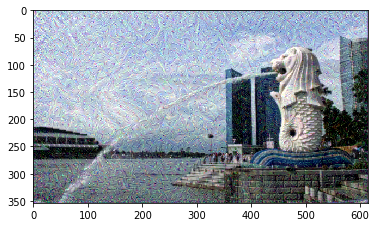

tensor(43.6495, device='cuda:0', grad_fn=<AddBackward0>)


In [8]:
deepdream("../img/000003.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


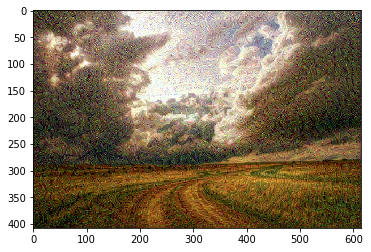

tensor(44.6636, device='cuda:0', grad_fn=<AddBackward0>)


In [9]:
deepdream("../img/000027.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


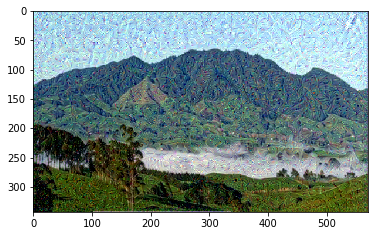

tensor(39.9868, device='cuda:0', grad_fn=<AddBackward0>)


In [10]:
deepdream("../img/000142.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


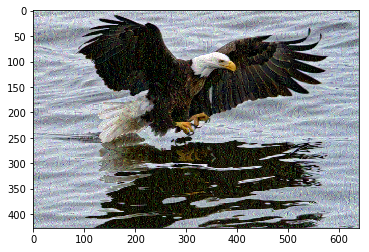

tensor(44.6088, device='cuda:0', grad_fn=<AddBackward0>)


In [11]:
deepdream("../img/000075.jpg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


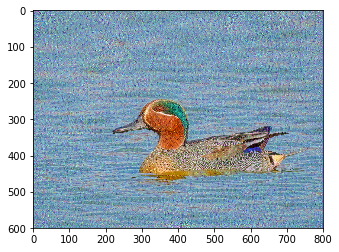

tensor(62.7026, device='cuda:0', grad_fn=<AddBackward0>)


In [12]:
deepdream("../img/000034.jpg")